In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,r2_score
from sklearn.svm import SVC

In [2]:
# loading the dataset

df=pd.read_csv(r"C:\Users\gajra\OneDrive\Desktop\Customer_data - customer_data.csv")
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


Essential Exploratry Data Anslysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# summary statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
# checking for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# filling null values in the totalcharges column
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

C:\Users\gajra\AppData\Local\Temp\ipykernel_18420\1197374446.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)


In [8]:
# confirming that null values are filled
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Visualization

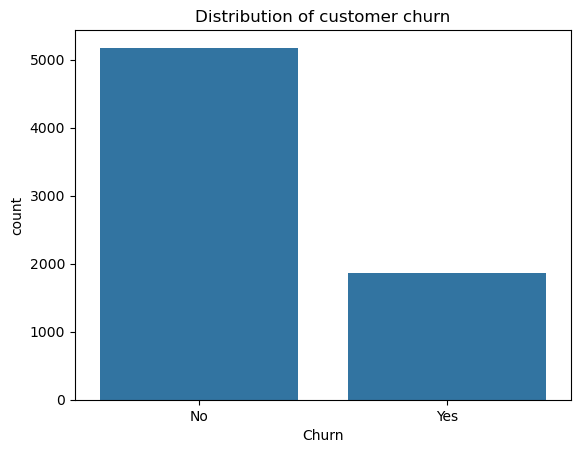

In [10]:
sns.countplot(x='Churn',data=df)
plt.title('Distribution of customer churn')
plt.show()

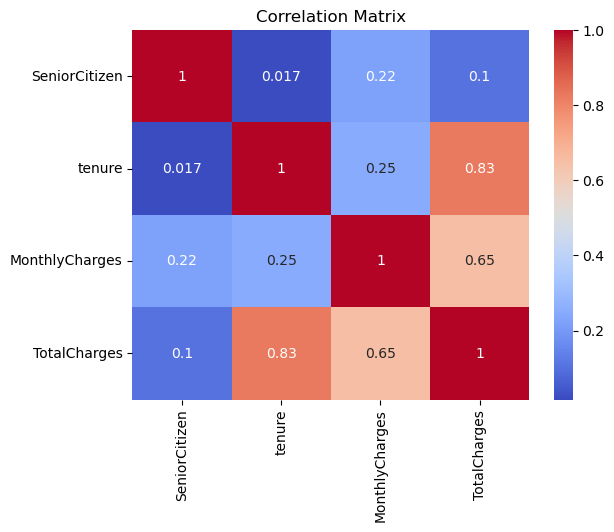

In [11]:
# Correlation matrix

num_cols = list()

for column in df.columns:
    if df[column].dtype != object:
       num_cols.append(column)
        
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Data Preprocessing

In [13]:
# Encode categorical variables
cols=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
      'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'] 

le=LabelEncoder()

for col in cols:
    df[col]=le.fit_transform(df[col]) 

In [14]:
# Features and target
x=df.drop(['customerID','Churn'],axis=1)
y=df['Churn']

In [15]:
# Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27)

Building Machine Learning Model

In [58]:
#  Building Logistic Regression model
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [18]:
# Display accuracy and performance metrics
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy*100:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 81.18
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1401
           1       0.68      0.54      0.60       501

    accuracy                           0.81      1902
   macro avg       0.76      0.72      0.74      1902
weighted avg       0.80      0.81      0.80      1902



Building Different Different models for a better accuracy

In [20]:
# Building randomforestclassifier model
rfc=RandomForestClassifier(n_estimators=500,criterion='gini')
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [21]:
# Checking score
rfc.score(x_test,y_test)

0.7965299684542587

Applying feature scaling and then building various models for a batter accuracy

In [23]:
# Feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [24]:
# logistic regression model
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pre=lg.predict(x_test)
accuracy=accuracy_score(y_test,y_pre)

In [25]:
# Display accuracy and performance metrics
print(f'Logistic Regression Accuracy: {accuracy*100:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, y_pre))

Logistic Regression Accuracy: 81.65

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1401
           1       0.70      0.53      0.60       501

    accuracy                           0.82      1902
   macro avg       0.77      0.72      0.74      1902
weighted avg       0.81      0.82      0.81      1902



In [26]:
# randomforestclassifier model
rfg=RandomForestClassifier(n_estimators=500,criterion='gini')
rfg.fit(x_train,y_train)
pred=rfg.predict(x_test)
accuracy=accuracy_score(y_test,pred)

In [27]:
# Display accuracy and performance metrics
print(f'RandomForestClassifier Accuracy: {accuracy*100:.2f}')
print('\nRandomForestClassifier Classification Report:')
print(classification_report(y_test, y_pre))

RandomForestClassifier Accuracy: 79.81

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1401
           1       0.70      0.53      0.60       501

    accuracy                           0.82      1902
   macro avg       0.77      0.72      0.74      1902
weighted avg       0.81      0.82      0.81      1902



In [28]:
# support vector classifier model
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)

In [29]:
# Display accuracy and performance metrics
print(f'SVC Accuracy: {acc*100:.2f}')
print('\nSVC Classification Report:')
print(classification_report(y_test, y_pre))

SVC Accuracy: 80.49

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1401
           1       0.70      0.53      0.60       501

    accuracy                           0.82      1902
   macro avg       0.77      0.72      0.74      1902
weighted avg       0.81      0.82      0.81      1902



In [30]:
# building a decesiontreeclassifier model
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
pred=tree.predict(x_test)
accuracy=accuracy_score(y_test,pred)

In [31]:
# Display accuracy and performance metrics
print(f'DecisionTreeClassifier Accuracy: {accuracy*100:.2f}')
print('\nDecisionTreeClassifier Classification Report:')
print(classification_report(y_test, y_pre))

DecisionTreeClassifier Accuracy: 72.40

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1401
           1       0.70      0.53      0.60       501

    accuracy                           0.82      1902
   macro avg       0.77      0.72      0.74      1902
weighted avg       0.81      0.82      0.81      1902

